In [1]:
import pandas as pd
import numpy as np

import matplotlib 
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/billboard-lyrics-spotify.csv')

In [3]:
df.drop(columns=['artist_base', 'song'], inplace=True)
df.rename(columns={'artist_clean': 'artist_base', 'song_clean': 'song'}, inplace=True)

In [4]:
df.head()

,artist_all,rank,year,artist_featured,song,artist_base,lyrics,danceability,energy,key,...,tempo,time_signature,popularity,explicit,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio
0,percy faith,1,1960,NaN,theme from a summer place,percy faith,theres a summer place where it may rain or sto...,0.213,0.3240,9.0,...,181.746,3.0,54.0,False,2.753567,104.0,0.629487,58.0,1960,0.557692
1,jim reeves,2,1960,NaN,hell have to go,jim reeves,put your sweet lips a little closer to the pho...,0.429,0.2830,0.0,...,79.076,3.0,51.0,False,2.373783,152.0,1.067213,69.0,1960,0.453947
2,the everly brothers,3,1960,NaN,cathys clown,the everly brothers,dont want your love any more dont want your k...,0.499,0.7010,7.0,...,120.240,4.0,25.0,False,2.429117,121.0,0.830206,64.0,1960,0.528926
3,johnny preston,4,1960,NaN,running bear,johnny preston,on the bank of the river stood running bear yo...,0.772,0.2970,5.0,...,119.987,4.0,25.0,False,2.636667,220.0,1.390645,89.0,1960,0.404545
4,mark dinning,5,1960,NaN,teen angel,mark dinning,teen angel teen angel teen angel that fateful ...,0.569,0.0638,0.0,...,101.521,4.0,26.0,False,2.664883,109.0,0.681706,73.0,1960,0.669725


# Artist Diversity Overtime

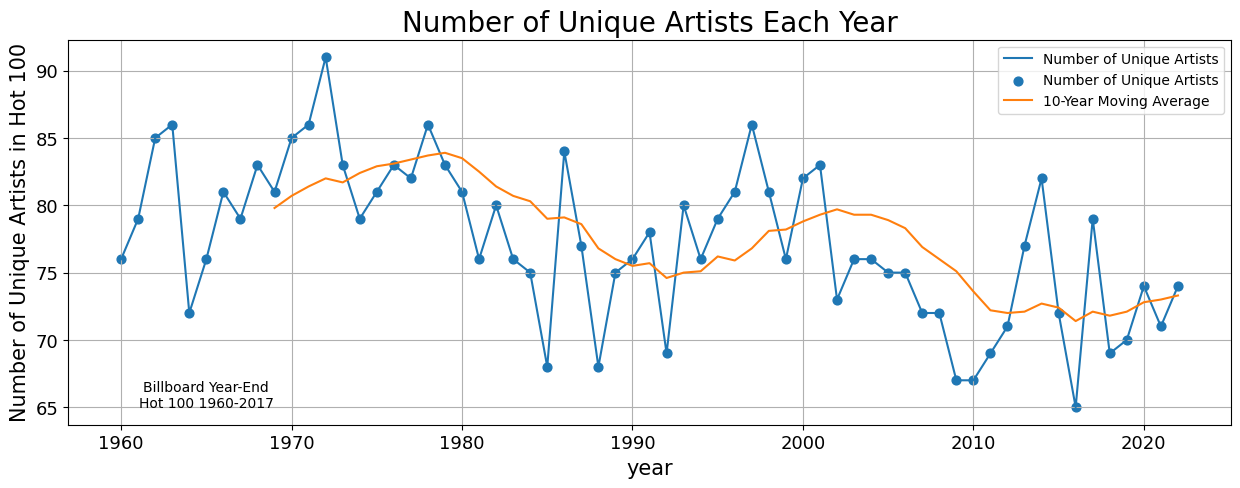

In [5]:
# calculate number of unique artists for each year
nunique_artists_year = df.groupby(['year'])['artist_base'].agg(pd.Series.nunique)

# generate line plot and augment with points
ax = nunique_artists_year.plot.line(figsize = (15,5), grid=True, label='# unique artists')
ax.scatter(nunique_artists_year.index, nunique_artists_year, s=40)
ax.set_ylabel('Number of Unique Artists in Hot 100', fontsize=15)
ax.set_xlabel("Year", fontsize=15)
ax.set_title('Number of Unique Artists Each Year', fontsize=20)

# denoise with a 10-year moving average
nunique_artists_year.rolling(window=10).mean().plot(
    grid=True, label='10-year moving average')
ax.annotate('Billboard Year-End\nHot 100 1960-2017', xy=(1965,65),
            fontsize=10, ha='center')
plt.legend(['Number of Unique Artists', "Number of Unique Artists",  '10-Year Moving Average']);